In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from models import Model4, Model5, Model6
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 4

In [6]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'skip_hidden_size': [32, 40],
    'skip': [8, 10]
}

grid_model4 = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model.pt', masked=False)
model_name = 'model4'
best_model4 = grid_model4.train_by_grid(
        Model4, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total   8 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:35<00:00, 16.74it/s, Train Loss=0.5919, Valid Loss=0.2244, Valid R2=0.4936, Valid MAE=0.3787]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:34<00:00, 16.85it/s, Train Loss=0.5919, Valid Loss=0.2289, Valid R2=0.4834, Valid MAE=0.4001]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [02:33<00:00, 16.97it/s, Train Loss=0.6055, Valid Loss=0.2302, Valid R2=0.4806, Valid MAE=0.3946]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [02:35<00:00, 16.72it/s, Train Loss=0.5753, Valid Loss=0.2027, Valid R2=0.5427, Valid MAE=0.3671]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [02:37<00:00, 16.53it/s, Train Loss=0.5870, Valid Loss=0.2139, Valid R2=0.5173, Valid MAE=0.3770]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [02:36<00:00, 16.71it/s, Train Loss=0.5888, Valid Loss=0.1683, Valid R2=0.6204, Valid MAE=0.3290]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [02:36<00:00, 16.69it/s, Train Loss=0.4999, Valid Loss=0.2695, Valid R2=0.3918, Valid MAE=0.3729]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:36<00:00, 16.67it/s, Train Loss=0.5569, Valid Loss=0.1801, Valid R2=0.5936, Valid MAE=0.3095]

Early Stopped


Test Loss: 0.1488 | Test R2: 0.9192 | Test MAE: 0.3098
Saving Process Complete. Directory: model4_losses.png


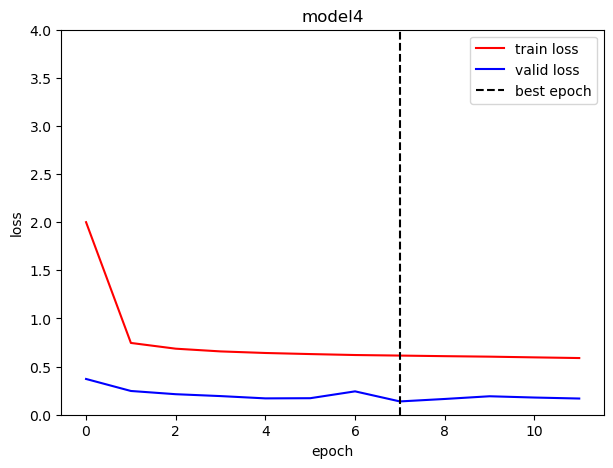

In [7]:
grid_model4.test(test_loader)
grid_model4.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')

# Model 5

In [8]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'p': [32, 40],
    'cnn_kernel_height': [20, 30],
    'cnn_hidden_size': [32, 40],
    'skip_hidden_size': [32, 40],
    'skip': [8, 10]
}

grid_model5 = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model.pt', masked=False)
model_name = 'model5'
best_model5 = grid_model5.train_by_grid(
        Model5, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total  32 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:32<00:00, 28.30it/s, Train Loss=0.7596, Valid Loss=0.1892, Valid R2=0.5732, Valid MAE=0.3467]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [01:31<00:00, 28.52it/s, Train Loss=0.6849, Valid Loss=0.2631, Valid R2=0.4064, Valid MAE=0.3948]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:28<00:00, 29.34it/s, Train Loss=0.9066, Valid Loss=0.2413, Valid R2=0.4556, Valid MAE=0.3910]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:32<00:00, 28.23it/s, Train Loss=0.6888, Valid Loss=0.2079, Valid R2=0.5309, Valid MAE=0.3572]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 18: 100%|██████████| 2607/2607 [01:32<00:00, 28.15it/s, Train Loss=0.6231, Valid Loss=0.2935, Valid R2=0.3378, Valid MAE=0.4058]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:32<00:00, 28.11it/s, Train Loss=0.7292, Valid Loss=0.2434, Valid R2=0.4509, Valid MAE=0.3811]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:29<00:00, 28.99it/s, Train Loss=0.7751, Valid Loss=0.1803, Valid R2=0.5932, Valid MAE=0.3447]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:30<00:00, 28.77it/s, Train Loss=0.6650, Valid Loss=0.3144, Valid R2=0.2907, Valid MAE=0.4198]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [01:16<00:00, 34.00it/s, Train Loss=0.5932, Valid Loss=0.2593, Valid R2=0.4150, Valid MAE=0.3699]


Early Stopped
Setting   9 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:17<00:00, 33.49it/s, Train Loss=0.7289, Valid Loss=0.2549, Valid R2=0.4248, Valid MAE=0.3937]


Early Stopped
Setting  10 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:15<00:00, 34.45it/s, Train Loss=0.9102, Valid Loss=0.2024, Valid R2=0.5434, Valid MAE=0.3569]


Early Stopped
Setting  11 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:16<00:00, 33.89it/s, Train Loss=0.7337, Valid Loss=0.1801, Valid R2=0.5937, Valid MAE=0.3485]


Early Stopped
Setting  12 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [01:16<00:00, 34.00it/s, Train Loss=0.6658, Valid Loss=0.1890, Valid R2=0.5736, Valid MAE=0.3519]


Early Stopped
Setting  13 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:18<00:00, 33.25it/s, Train Loss=0.8847, Valid Loss=0.1600, Valid R2=0.6390, Valid MAE=0.3134]


Early Stopped
Setting  14 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:16<00:00, 34.02it/s, Train Loss=0.7869, Valid Loss=0.1628, Valid R2=0.6327, Valid MAE=0.3056]


Early Stopped
Setting  15 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:15<00:00, 34.37it/s, Train Loss=0.7398, Valid Loss=0.2211, Valid R2=0.5011, Valid MAE=0.3747]


Early Stopped
Setting  16 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:32<00:00, 28.27it/s, Train Loss=0.7573, Valid Loss=0.2252, Valid R2=0.4920, Valid MAE=0.3833]


Early Stopped
Setting  17 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:31<00:00, 28.53it/s, Train Loss=0.6690, Valid Loss=0.2094, Valid R2=0.5274, Valid MAE=0.3625]


Early Stopped
Setting  18 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:32<00:00, 28.27it/s, Train Loss=0.8456, Valid Loss=0.1736, Valid R2=0.6083, Valid MAE=0.3339]


Early Stopped
Setting  19 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:31<00:00, 28.36it/s, Train Loss=0.8214, Valid Loss=0.2696, Valid R2=0.3918, Valid MAE=0.4348]


Early Stopped
Setting  20 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:33<00:00, 27.91it/s, Train Loss=0.7079, Valid Loss=0.2606, Valid R2=0.4120, Valid MAE=0.3881]


Early Stopped
Setting  21 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:33<00:00, 27.78it/s, Train Loss=0.7092, Valid Loss=0.2288, Valid R2=0.4838, Valid MAE=0.3641]


Early Stopped
Setting  22 of Parameters Grid is now on progres.


Epoch  6: 100%|██████████| 2607/2607 [01:33<00:00, 27.99it/s, Train Loss=0.7412, Valid Loss=0.2044, Valid R2=0.5387, Valid MAE=0.3609]


Early Stopped
Setting  23 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:34<00:00, 27.57it/s, Train Loss=0.7337, Valid Loss=0.3581, Valid R2=0.1919, Valid MAE=0.4672]


Early Stopped
Setting  24 of Parameters Grid is now on progres.


Epoch  5: 100%|██████████| 2607/2607 [01:19<00:00, 32.86it/s, Train Loss=0.8815, Valid Loss=0.2847, Valid R2=0.3576, Valid MAE=0.4384]


Early Stopped
Setting  25 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:19<00:00, 32.81it/s, Train Loss=0.7301, Valid Loss=0.1888, Valid R2=0.5741, Valid MAE=0.3374]


Early Stopped
Setting  26 of Parameters Grid is now on progres.


Epoch  4: 100%|██████████| 2607/2607 [01:16<00:00, 34.12it/s, Train Loss=0.8767, Valid Loss=0.2208, Valid R2=0.5018, Valid MAE=0.3857]


Early Stopped
Setting  27 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:15<00:00, 34.50it/s, Train Loss=0.7489, Valid Loss=0.1744, Valid R2=0.6065, Valid MAE=0.3142]


Early Stopped
Setting  28 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:17<00:00, 33.73it/s, Train Loss=0.6962, Valid Loss=0.1442, Valid R2=0.6747, Valid MAE=0.3147]


Early Stopped
Setting  29 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [01:18<00:00, 33.15it/s, Train Loss=0.6287, Valid Loss=0.1625, Valid R2=0.6333, Valid MAE=0.3167]


Early Stopped
Setting  30 of Parameters Grid is now on progres.


Epoch 11: 100%|██████████| 2607/2607 [01:16<00:00, 33.89it/s, Train Loss=0.6845, Valid Loss=0.1541, Valid R2=0.6523, Valid MAE=0.3012]


Early Stopped
Setting  31 of Parameters Grid is now on progres.


Epoch  7: 100%|██████████| 2607/2607 [01:16<00:00, 34.07it/s, Train Loss=0.7511, Valid Loss=0.1865, Valid R2=0.5793, Valid MAE=0.3285]


Early Stopped


Test Loss: 0.1406 | Test R2: 0.9236 | Test MAE: 0.3074
Saving Process Complete. Directory: model4_losses.png


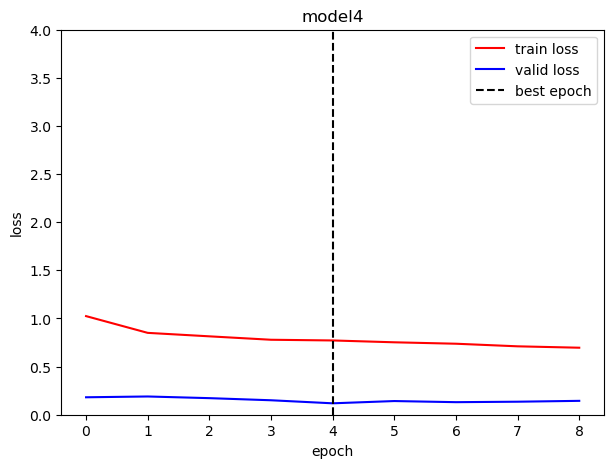

In [9]:
grid_model5.test(test_loader)
grid_model5.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')

# Model 6

In [10]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'T_modified': [20, 30],
}

grid_model6 = GridSearch(criterion, eval_metrics, device, temp_save_path='checkpoints/model_by_param/temp_model.pt', masked=False)
model_name = 'model6'
best_model6 = grid_model6.train_by_grid(
        Model6, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total   4 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 19: 100%|██████████| 2607/2607 [01:15<00:00, 34.63it/s, Train Loss=0.6597, Valid Loss=0.1314, Valid R2=0.7034, Valid MAE=0.2836]


Setting   1 of Parameters Grid is now on progres.


Epoch 19: 100%|██████████| 2607/2607 [01:35<00:00, 27.44it/s, Train Loss=0.6590, Valid Loss=0.1194, Valid R2=0.7306, Valid MAE=0.2858]


Setting   2 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [01:15<00:00, 34.47it/s, Train Loss=0.6631, Valid Loss=0.1310, Valid R2=0.7044, Valid MAE=0.2872]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 18: 100%|██████████| 2607/2607 [01:32<00:00, 28.06it/s, Train Loss=0.6310, Valid Loss=0.1464, Valid R2=0.6697, Valid MAE=0.3002]

Early Stopped


Test Loss: 0.2684 | Test R2: 0.8542 | Test MAE: 0.4187
Saving Process Complete. Directory: model6_losses.png


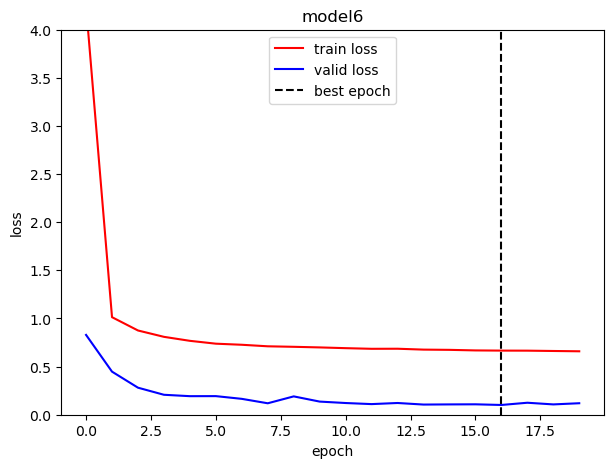

In [11]:
grid_model6.test(test_loader)
grid_model6.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')